### SUPERVISED LEARNING OVERVIEW

In [ ]:
# Y -> Label. it is just the term for what are we trying to predict
# X -> Features. are the know characteristics in the data set that we are predicting from

In [ ]:
# once we identify the features and the labels we split the data into a training set and a test set
# cross validation is amongst advanced technoques

In [ ]:
# why perform split and how to split
# train the model and test the model on the basisi of the trained data.

In [ ]:
# we have 4 components --> X-train, X-Test, Y-Train, Y-Test

In [ ]:
# we train the model giving it X-train,Y-Train and then test it by  giving the X-Test.
# we then compare the Y-test the model predicts with the actual values.

In [ ]:
# after we have trained the data and tested it we further fit/train the model and evaluate the performance of the model on the test data again


In [ ]:
# what happens if the performance is not that great
# we can adjust model hyperparameters
# Train data set --> Fit/Train the model (adjust model) --> evaluate performance <-- Test data set

# **LINEAR REGRESSION**

In [ ]:
# TO DO
# theory of linear regression
# simple implementation with python
#scikit learn overview
# linear regression with scikit learn
# polynomial regression
# regularization
# overview of the project dataset

### THEORY OF LINEAR REGRESSION

##### Algorithm History

In [ ]:
# Ordinary least squares works by minimizing the sum of the squares od the difference between the observed dependent variable (values of the variable being observed) in the given data set and thpse predicted by the linear function
#  having a squared error will help us simplify our calc later on when setting up a derivative

##### Understanding Ordinary Leaset Squares

In [ ]:
# IN NOTES (P)

##### Cost Functions

In [ ]:
# IN NOTES (P)

##### Gradient Descent

In [ ]:
# IN NOTES (P)

### PYTHON CODING SIMPLE LINEAR REGRESSION

In [ ]:
# applying the simple linear regression with one feature
# linear regression between the total advertising spend and resulting sales

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Advertising.csv')

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

In [ ]:
df

In [ ]:
# Scatter plot
sns.scatterplot(data = df, x = 'total_spend', y = 'sales')

In [ ]:
# plot of regression on the scatterplot
sns.regplot(data = df, x = 'total_spend', y = 'sales')

In [ ]:
X = df['total_spend']
y = df['sales']

In [ ]:
help(np.polyfit)
# in this case the deg of polyfit is 1 because we have only one fearure
# y = mx + b
# y = B1x + B0

In [ ]:
# this gices the value of the beta coeff
np.polyfit(X,y,deg = 1)

In [ ]:
# np.linspace creates samples in evenly spaced are between the points that are in arguments
potential_spend = np.linspace(0, 500, 100)
# we are basically predicting the sales on teh basis of potential spend between 0 to 500

In [ ]:
predicted_sales = 0.04868788*potential_spend + 4.24302822

In [ ]:
# the line below produces a scatterplot
sns.scatterplot(data = df, x = 'total_spend', y = 'sales')
# the line below just produces a regression line
plt.plot(potential_spend, predicted_sales, color = 'red') 
# when both lines are written it give the regression ine on the scatter plots giving us how the line foits teh datapoints


In [ ]:
spend = 200

predicted_sales = 0.04868788*spend + 4.24302822

In [ ]:
predicted_sales

In [ ]:
# till here we have managed to predict but we are lacking performance and here comes scikitlearn library

In [ ]:
# y = B3x**3 + B4x**2 + B1x + B0
np.polyfit(X,y, 3)

In [ ]:
pot_spend = np.linspace(0,500,100)

In [ ]:
pred_sales = 3.07615033e-07*pot_spend**3 + -1.89392449e-04*pot_spend**2 + 8.20886302e-02*pot_spend**1 + 2.70495053e+00

In [ ]:
sns.scatterplot(x = 'total_spend', y = 'sales', data = df)
plt.plot(pot_spend, pred_sales, color = 'red')

### SCIKIT-LEARN 

##### OVERVIEW

In [ ]:
# scikit learn is a library conatining many machine learning algorithms
# it utilizes a generalised "estimator API" frameworkk to calling the models
# this means the way algorithms are imported, fitted and used is uniform across all algorithms

##### TRAIN TEST SPLIT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('Advertising.csv')

In [8]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


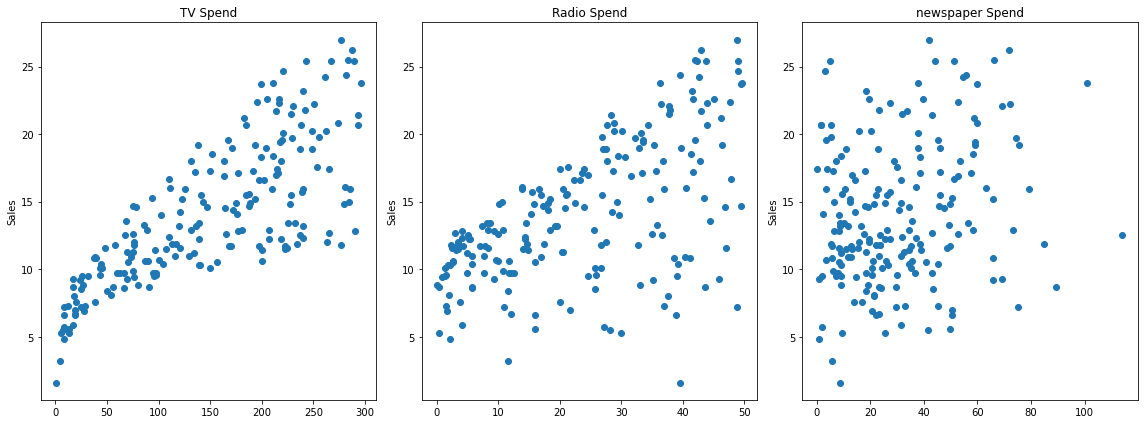

In [9]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_ylabel("Sales")
axes[1].set_title("Radio Spend")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_ylabel("Sales")
axes[2].set_title("newspaper Spend")

plt.tight_layout();

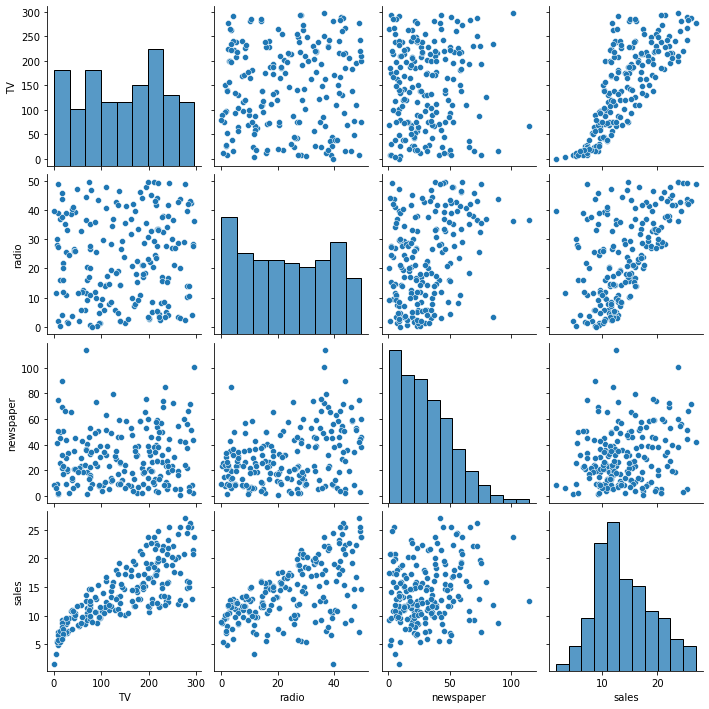

In [10]:
# this plots graphs for each feature
sns.pairplot(df)

In [11]:
# this quickly gets us all the features without the Ylabel
X = df.drop('sales', axis=1)

In [12]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [22]:
y = df['sales']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to 

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

In [28]:
len(df)

200

In [30]:
len(X_train)

140

In [31]:
X_train

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [32]:
len(X_test)

60

In [34]:
from sklearn.linear_model import LinearRegression

In [37]:
# help(LinearRegression)

In [38]:
model = LinearRegression()

In [39]:
model.fit(X_train,y_train)

LinearRegression()

In [40]:
model.predict(X_test)

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

##### PERFORMANCE EVALUATION

In [41]:
# REGREESION MATRICS

In [42]:
# most common evaluation metrics for regression:
# 1. Mean absolute error
# 2. Mean squared error
# 3. Root mean square error

In [43]:
# 1. MEAN ABSOLUTE ERROR

In [44]:
# applying on the linear regression model we did in previous section

In [47]:
test_predictions = model.predict(X_test)

In [49]:
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [52]:
df['sales'].mean()

14.022500000000003

<AxesSubplot:xlabel='sales', ylabel='Count'>

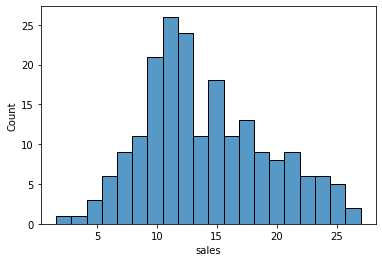

In [56]:
sns.histplot(data=df,x='sales',bins=20)

In [57]:
mean_absolute_error(y_test, test_predictions)

1.213745773614481

In [58]:
# MEAN SQUARED ERROR

In [59]:
mean_squared_error(y_test,test_predictions)

2.2987166978863782

In [60]:
# ROOT MEAN SQUARED ERROR

In [67]:
np.sqrt(mean_squared_error(y_test,test_predictions))

1.516151937599388

### RESIDUAL PLOTS

In [64]:
# often for linear regression it is good idea to seperately evaluate residuals (same formula as MAE) and not just calcluate metrics (RMSE)
# the residual errors should be random and close to the normal distribution
# if we plot the residual along with y then all data points should come on the line drawn at zero if the regression line is a perfect fit

In [66]:
# we can plot residuals and get to know if the data set is not valid for linea regression
# we should plot all three of the residual plots to analyze the data sets
# most imprtant is the residual vs y (real value) plot

In [68]:
test_residuals = y_test - test_predictions

In [70]:
test_residuals

37    -1.041313
109    0.189374
31     0.451111
89    -0.308198
66     0.327143
119   -0.412483
54    -0.089925
74    -0.299540
145    0.524155
142    0.878058
148   -1.505032
112    0.207650
174   -2.225411
55     2.412060
141    0.775434
149    0.118016
25    -3.552290
34     1.810863
170    0.843850
39     1.096888
172   -0.192152
153    0.757859
175    2.313681
61     1.378009
65     1.320379
50    -1.252073
42    -0.769259
129    1.647714
179    0.176840
2     -3.207197
12    -1.577578
133    0.355399
90     1.129731
22    -1.107800
41    -0.214921
32     1.832357
125    1.346067
196    1.421653
158   -3.281056
180   -0.135911
16    -0.510026
186    0.528079
144    1.185301
121   -1.045720
80     0.232893
18     1.216320
78    -3.698066
48    -1.453889
4     -0.339423
15     1.585066
1     -2.097274
43    -1.066159
102   -2.762851
164    0.754630
9     -1.962615
155   -2.308703
36     2.105349
190   -1.824097
33    -1.374000
45    -0.287857
Name: sales, dtype: float64

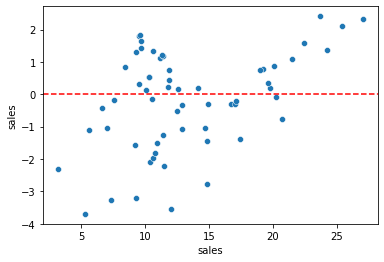

In [82]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='r', ls='--')
# plt.axhline(y=0, color='r', ls='--') is for plotting a horizontal line

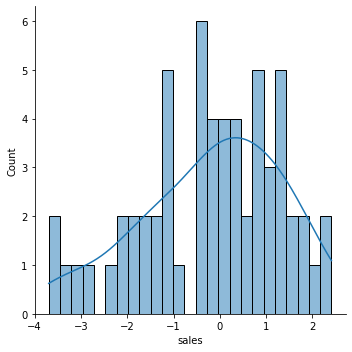

In [84]:
sns.displot(test_residuals, bins=25, kde='True')

In [85]:
import scipy as sp

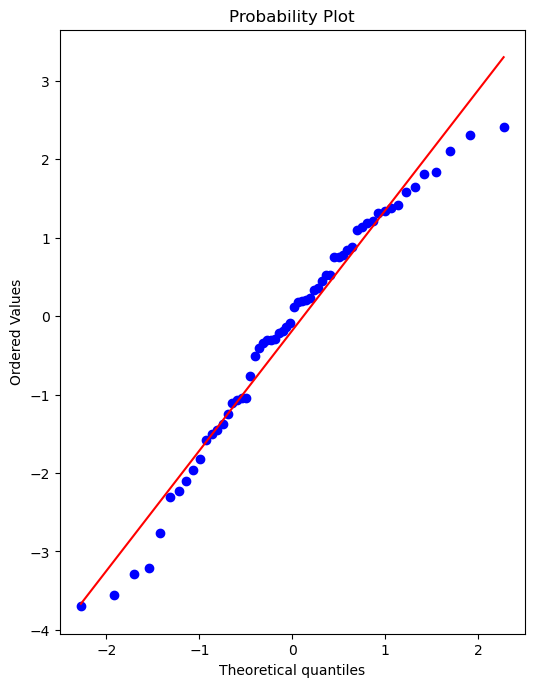

In [92]:
# create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8), dpi=100)
# probplot returns the raw values if needed
# we hust want to see the plot, so we assign these these vlaues to
_=sp.stats.probplot(test_residuals,plot=ax)
#the red line shows how the normal distribution looks like
# so it compares the normal distribution with the distribution of our residual

### MODEL DEPLOYMENT AND COEFFICIENT INTERPRETATION

In [95]:
final_model = LinearRegression()

In [97]:
final_model.fit(X,y)

LinearRegression()

In [99]:
final_model.coef_
# these are the coeff of the features
# this means taht if we increase one unit of tv (keeping the others const) there will be an increase of "0.04576465 units" in sales

array([ 0.04576465,  0.18853002, -0.00103749])

In [100]:
 y_hat = final_model.predict(X)

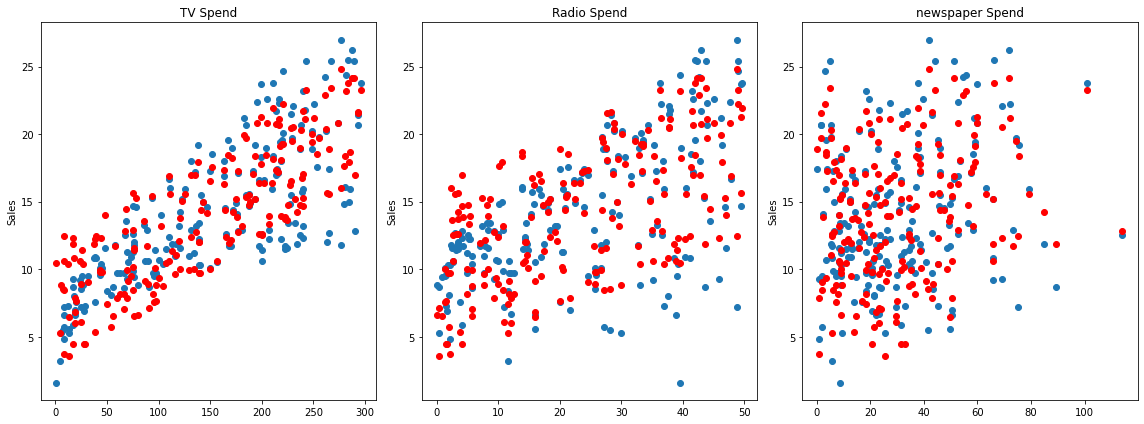

In [103]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'], y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'], y_hat,'o',color='red')
axes[1].set_ylabel("Sales")
axes[1].set_title("Radio Spend")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['newspaper'], y_hat,'o',color='red')
axes[2].set_ylabel("Sales")
axes[2].set_title("newspaper Spend")

plt.tight_layout();

In [104]:
# saving and loading a model

In [105]:
from joblib import dump,load

In [107]:
dump(final_model, 'final_sales_model.joblib')

['final_sales_model.joblib']

In [111]:
loaded_model = load('final_sales_model.joblib')

In [113]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [114]:
X.shape

(200, 3)

In [116]:
# 149 tv, 22 Radio, 12 newspaper
campaign = [[149,22,12]]

In [117]:
loaded_model.predict(campaign)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])

# POLYNOMIAL REGRESSION

##### THEORY

In [118]:
# there are two issues polynomial regression will adress for us:
# 1. non linear feature relationships to label
# 2. interaction terms between features

# if we take the square of the features it starts linearizing and if we go to higher oerders it increases linearization
# and we can find good beta coeff with higher order
# taking a polynomial to higher order have its own issues

# interaction features:
# if we have features A and B
# we will get 1, A, B, A^2, B^2, AB


##### CREATING POLYNOMIAL FEATURES

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
df = pd.read_csv("advertising.csv")

In [121]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [136]:
X = df.drop('sales', axis = 1)

In [137]:
y = df['sales']

In [138]:
from sklearn.preprocessing import PolynomialFeatures

In [146]:
polynomial_converter = PolynomialFeatures(degree = 2, include_bias = False)

In [147]:
polynomial_converter.fit(X)
# fit will not return anything untill we call transform

PolynomialFeatures(include_bias=False)

In [148]:
poly_features = polynomial_converter.transform(X)

In [149]:
polynomial_converter.transform(X).shape

(200, 9)

In [150]:
X.shape

(200, 3)

In [151]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [152]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [154]:
# there is another method to fit and transform at the same time
polynomial_converter.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

##### TRAINING AND EVALUATION

In [155]:
from sklearn.model_selection import train_test_split

In [156]:
# we are going to apply train_test_split on poly_features because we have more features in this than the original features
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=101)

In [157]:
from sklearn.linear_model import LinearRegression

In [158]:
model = LinearRegression()

In [159]:
model.fit(X_train, y_train)

LinearRegression()

In [160]:
test_predictions = model.predict(X_test)

In [161]:
# model.coef_

array([ 5.25319441e-02,  1.42773271e-02,  1.47528851e-02, -1.12739168e-04,
        1.13231490e-03, -5.42180033e-05,  6.26813126e-05,  8.93347558e-05,
       -3.52004070e-05])

In [163]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [164]:
MAE = mean_absolute_error(y_test, test_predictions)

In [166]:
MSE = mean_squared_error(y_test, test_predictions)

In [167]:
RMSE = np.sqrt(MSE)

In [168]:
MAE

0.48428105352156275

In [169]:
MSE

0.42028148421570233

In [170]:
RMSE

0.64829120325337

##### BIAS-VARIANCE TRADE OFF (OVERFITTING VS UNDERFITTING)

In [173]:
# in general, increasing the complexity in search for better performance leads to a Bias-Variance trade off
# we want to have a model that can generalize well to new unseen data, but can also account for variance and patterns in the known data
# extreme bias or extreme variance both lead to bad models

In [174]:
# OVERFITTING
# the model fits too much to the noise from the data
# this often results in low error on training sets but high error on test/validation sets
# overfitting is hard to detect as it performs good on training set rather than test set

In [175]:
# UNDERFITTING
# model does not capture the underlying trend of the data and does not fit to the data well enough
# low variance but high bias
# underfitting is often a result of an excessively simple model
# model has high bias and is generalizing too much
# underfitting can lead to poor performance in both the training and the testing data sets
# high bias means that the prediction is off or inaccurate

##### CHOOSING DEGREE OF POLYNOMIAL

In [177]:
# create the different order poly
# split poly feat train/test
# fit on train
# store/save the rmse for both the train and test
# plot the reults (errors vs poly order)

In [180]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):
    
    poly_converter = PolynomialFeatures(degree=d, include_bias = False)
    poly_features = poly_converter.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=101)
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)
    
    

In [181]:
train_rmse_errors

[1.7376515982447711,
 0.5947926597019144,
 0.44059734232363623,
 0.35329132820381115,
 0.24845372491167317,
 0.18836220066978124,
 4.722022110071159,
 0.1532342500517892,
 0.15071772152275037]

In [182]:
test_rmse_errors

[1.5324409426512413,
 0.64829120325337,
 0.5577254823362452,
 0.5064297307498219,
 2.3573610784372336,
 11.21771417886336,
 1194.3666980368562,
 3468.9957768098748,
 166098.4151585643]

<function matplotlib.pyplot.legend(*args, **kwargs)>

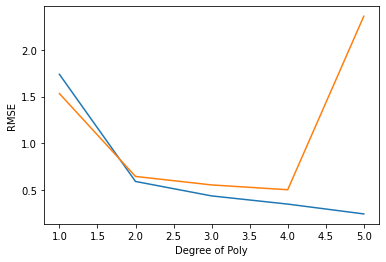

In [188]:
plt.plot(range(1,6), train_rmse_errors[:5], label='TRAIN RMSE')
plt.plot(range(1,6), test_rmse_errors[:5], label=' RMSE')

plt.ylabel('RMSE')
plt.xlabel('Degree of Poly')
plt.legend

##### MODEL DEPLOYMENT

In [191]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias = False)

In [192]:
final_model = LinearRegression()

In [194]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X, y)

LinearRegression()

In [197]:
from joblib import dump,load

In [198]:
dump(final_model,'final_poly_model.joblib')

['final_poly_model.joblib']

In [199]:
dump(final_poly_converter,'final_converter.joblib')

['final_converter.joblib']

In [200]:
loaded_converter = load('final_converter.joblib')

In [201]:
loaded_model = load('final_poly_model.joblib')

In [202]:
camplaign = [[149,22,12]]

In [204]:
transformed_data = loaded_converter.fit_transform(campaign)

In [206]:
loaded_model.predict(transformed_data)

array([14.64501014])

### REGULARIZATION

In [207]:
# it seeks to solve a few common model issues by:
# 1. minimizing model complexity
# 2. penalizing the loss function
# 3. reducing model overfitting (add more bias to reduce model variance)

# in general, we can think of regularization as a way to reduce model overfitting and variance
# 1. requires some additional bias
# 2. requires a search for optimal penalty hyperparameter

# three types of regularization
# 1. L1 => lasso regression
# 2. L2 => Ridge regression
# 3. Elastic net

In [208]:
# L1 regularizations
# adds penalty equal to the absolute value of the magnitude of coeff

# L2 regularization
# adds a penalty equal to the square of the magnitude of the coeff

# Elastic net combines l1 and l2 with addition to an alpha parameter deciding the ratio between them
# if alpha is zero it cancels out the absolute value term
# if alpha is one it cancels out the absolute squared term

# these reg methods do have a cost:
# 1. introduce an additional hyperparameter that needs to be tuned
# 2. a multiplier to the penalty to decide the "strength" of the penalty

##### FEATURE SCALING

In [210]:
# feature scaling imporves the convergence of steepest descent algorithms, which do not posses the property of scale invarieance
# if features are on diff scales, certain weights may update daster than others since the feature values Xj play a role in the weight update
# scaling features does not affect all of the ML algos such as decision trees and random forrest

In [212]:
# feature scaling limitations:
# must always scale new unseen data before feeding to model
# effects direct interpretability of feature coefficients
# easier to compare coeff to one another, harder to relate back to original unscaled feature

# feature scaling benefits
# can lead to great increase in performance
# absolutely necessary for som models
# virtually no real downside to scaling features

In [213]:
# two main ways to scale features:
# Standardization
#     rescales data to have a mean of 0 and std of 1
# Normalization
#     rescales all the data values to be between 0-1

In [214]:
# A fit() call simply calculates the necessary statistics (Xmin, Xmax, mean and std)
# A transform() call actually scales the data and returns teh new scaled version of the data
# previosly saw a similar process for polynomial feature conversion

In [215]:
# very important consideration for fit and transform:
# we only fit to training data
# calculating statistical information should only come from the training data
# dont want to assume prioir knowledge of teh test set

# using full data set would cause data leakage

# feature scaling proces:
# 1. perform train test split
# 2. fit to training feature data
# 3. transform training feature data
# 4. transform test feature data

# Do we need to scale the label?
# in general it is not necessary nor advised
# normalising the output dist is altering the definition of teh target
# predicting a dist that does not mirror real-world target
# can actually neg impact stohastic gradient descent

### CROSS VALIDATION

In [216]:
# advanced set of methods for splitting into training and testing sets

# how cacn we understand how the model behaves for the data that is has not seen and not been influenced by fot hyperparameter tuning
# for this we can usde hold out test set

# hold out:
# we hold out a piece of data and set it aside
# we perform the cross validation and hyperparameter tuning on the other data set
# and then perform evaluation with the hold out test data
# we can not perform tuning after this final test evaluation

### REGULARIZATION FOR LINEAR REGRESSION

##### DATA SET UP

In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [218]:
df = pd.read_csv('Advertising.csv')

In [219]:
X = df.drop('sales', axis=1)

In [220]:
y = df['sales']

In [223]:
from sklearn.preprocessing import PolynomialFeatures

In [224]:
polynomial_converter = PolynomialFeatures(degree=3,include_bias=False)

In [225]:
poly_features = polynomial_converter.fit_transform(X)

In [229]:
X.shape

(200, 3)

In [230]:
poly_features.shape

(200, 19)

In [234]:
from sklearn.model_selection import train_test_split

In [236]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [237]:
X_train.shape

(140, 19)

In [240]:
from sklearn.preprocessing import StandardScaler

In [241]:
scaler = StandardScaler()

In [242]:
scaler.fit(X_train)

StandardScaler()

In [243]:
X_train = scaler.transform(X_train)

In [245]:
X_test = scaler.transform(X_test)

In [246]:
X_train[0]

array([ 0.49300171, -0.33994238,  1.61586707,  0.28407363, -0.02568776,
        1.49677566, -0.59023161,  0.41659155,  1.6137853 ,  0.08057172,
       -0.05392229,  1.01524393, -0.36986163,  0.52457967,  1.48737034,
       -0.66096022, -0.16360242,  0.54694754,  1.37075536])

##### RIDGE REGRESSION (L2)

In [250]:
# the beta coeff were solved by minimizing the residual sum of squares (RSS)
#  RSS = sum of (y - ymean)^2
# substitute the beta coeffs in ymean
# including the penalty in the RSS lowers the slope and generalizes the fit of the line
# increasing the slope of the line means we are overfitting
# increasing the x component (sum of beta coeff multiplied with lambda) we can lower the slope of the line which means more generalization
# what ridge reg is trying to do is making sure that we are not overly responsive to the training dat aso that when the test data comes in we have more bias and we can generalize better to unseen data
# its going to punish the larger coeef which are responsible for steep slopes

# how to choose lambda
# we can do it by using cross validation

##### IMPLEMENTATION OF RIDGE REGRESSION

In [252]:
# all the hyperparameters in python class calls are alpha
# also in ridge the lambda is called alpha

# for cross validation metrics, sklearn uses a "scorer object"
# all scorer objects follow the convention that higher values are better than lower return values
# for example, hugher accuracy is better
# but higher RMSE is worse, so sklearn fixes this by using a neg RMSE as its scorer metric

In [253]:
# all polyfeatures and scaling has been done so we will just apply sclaing

In [254]:
from sklearn.linear_model import Ridge

In [256]:
# help(Ridge)

In [257]:
ridge_model = Ridge(alpha=10)

In [258]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=10)

In [259]:
test_predictions = ridge_model.predict(X_test)

In [260]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [261]:
MAE = mean_absolute_error(y_test, test_predictions)

In [262]:
MAE

0.5774404204714183

In [263]:
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))

In [264]:
RMSE

0.8946386461319685

In [265]:
from sklearn.linear_model import RidgeCV
# RidgeCV is ridge for cross validation
# and give us the optimum value of the alpha hhyperparameter

In [276]:
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0), scoring = 'neg_mean_absolute_error')

In [277]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error')

In [278]:
ridge_cv_model.alpha_
# give us the alpha value which is the best

0.1

In [272]:
# from sklearn.metrics import SCORERS

In [274]:
# SCORERS.keys()

# this give a list of all the errors that can be performed
# all these errors are transformed so that higher is better

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [279]:
test_predictions = ridge_cv_model.predict(X_test)

In [280]:
MAE = mean_absolute_error(y_test, test_predictions)

In [281]:
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))

In [282]:
MAE

0.42737748843352086

In [283]:
RMSE

0.6180719926924644

In [286]:
ridge_cv_model.coef_

array([ 5.40769392,  0.5885865 ,  0.40390395, -6.18263924,  4.59607939,
       -1.18789654, -1.15200458,  0.57837796, -0.1261586 ,  2.5569777 ,
       -1.38900471,  0.86059434,  0.72219553, -0.26129256,  0.17870787,
        0.44353612, -0.21362436, -0.04622473, -0.06441449])

##### LASSO REGRESSION (L1) THEORY AND IMPLEMENTATION

In [289]:
# instead of the squared value of the beta values we are considering only the beta values

# limits the size of the coeffs
# can yield sparse models where some coeffs can become zero

# lasso can force some of the coefs ectimates to be exactly equal to zero when the tuning parameter lambda is sufficiently large
# similar to the subset selection, the lasso performs variable selection
# models generated from the lasso are generally much easier to interpret

In [292]:
from sklearn.linear_model import LassoCV

In [293]:
# there are other CV techniques in lasso such as LassoLarsCV and LassoLarsIC

In [308]:
lasso_cv_model = LassoCV(eps=0.1, n_alphas=100, cv=5)
# to solve the convergence warning
# set max_iter = 100000
# or
# reduce the value of eps

In [309]:
lasso_cv_model.fit(X_train,y_train)

# this may give a warning saying "Objective did not converge"
# to fix this we can do
# set max_iter = 100000 in LassoCV()

LassoCV(cv=5, eps=0.1)

In [310]:
lasso_cv_model.alpha_

0.4943070909225828

In [313]:
test_predictions = lasso_cv_model.predict(X_test)

In [314]:
MAE = mean_absolute_error(y_test, test_predictions)

In [315]:
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))

In [316]:
MAE

0.6541723161252854

In [317]:
RMSE

1.130800102276253

In [318]:
# in this case for these hyper params lasso is not performing weel than ridge model

In [319]:
lasso_cv_model.coef_

array([1.002651  , 0.        , 0.        , 0.        , 3.79745279,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [321]:
# the model is considering only two features unlike ridge model which considered all the features
# thsi enables us to interpret the scenario better
# although lasso performed worse on MAE and RSE but it is easier for us to interpret the model
# maybe we only need to consider two features
# it depends if this tradeof is worth it respective to our case or problem that we are trying to solve

In [322]:
# by setting eps = 0.001 and max_iter = 100000 we have a model that performs better on MAE and RMSE alost similar to ridge. but in ridge it considered all the features whereas lasso considers few features
# by setting the values above we make the model a bit more complex as it considers more features than before

##### ELASTIC NET

In [323]:
# combines lasso and ridge
# lasso => |beta1| + |beta2| <= s
# lasso => beta1^2 + beta2^2 <= s
# where 's' is some value

In [324]:
# electic net have both lasso and ridge penalty value having lambda1 and lambda2

In [332]:
from sklearn.linear_model import ElasticNetCV

In [333]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], eps=0.001, n_alphas=100, max_iter=100000)

In [334]:
elastic_model.fit(X_train, y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=100000)

In [337]:
elastic_model.l1_ratio
# all values of l1_ratio

[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]

In [338]:
elastic_model.l1_ratio_
# best performing l1_ratio

1.0

In [340]:
elastic_model.alpha_

0.004943070909225827

In [343]:
test_predictions = elastic_model.predict(X_test)

In [344]:
MAE = mean_absolute_error(y_test, test_predictions)

In [345]:
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))

In [346]:
MAE

0.43350346185900673

In [347]:
RMSE

0.6063140748984039

In [348]:
# in future go to elastic model where it will go to lasso or ridge itself where needed